# Starbucks Capstone 

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 





# Problem

In this project, the dataset of Starbucks customer behavior is investigated and analysed. Starbucks collected data about customers and how they reacted with the offers sent via mobile app. The offers might be a discount or buy one get one free (BOGO).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed



**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)



In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import math
import json
from matplotlib import pyplot as plt
import seaborn as sns

% matplotlib inline



# Import Data

In [2]:
# read in the json files
portfolio_data = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile_data = pd.read_json('data/profile.json', orient='records', lines=True)
transcript_data = pd.read_json('data/transcript.json', orient='records', lines=True)



## 1-investigating and understanding portfolio dataset

In [3]:
portfolio_data.shape

(10, 6)

In [4]:
portfolio_data.head()

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [5]:
portfolio_data.info()
print("------------------")
portfolio_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
id            10 non-null object
offer_type    10 non-null object
reward        10 non-null int64
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes
------------------


channels      0
difficulty    0
duration      0
id            0
offer_type    0
reward        0
dtype: int64


**Cleaning the portfolio dataset** <br>
1.Rename the column of id to be offer_id instead. <br>
2.Encoding the column of channels <br>
3.Create dummy variables for the column offer_type <br>


In [6]:
# 1.Rename the column of id to be offer_id instead.
portfolio_data.rename(columns={'id': 'offer_id'}, inplace=True)


In [7]:

# 3-create dummy variable for offer_type field
dm = pd.DataFrame(pd.get_dummies(portfolio_data.offer_type))
portfolio_data = pd.concat([portfolio_data, dm], axis=1)
del portfolio_data['offer_type']

portfolio_data.head()

,channels,difficulty,duration,offer_id,reward,bogo,discount,informational
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,10,1,0,0
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,10,1,0,0
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,0,0,0,1
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,1,0,0
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,0,1,0


In [8]:
# 2- Encoding the colunm channels

channels = ['web', 'email', 'social', 'mobile']
for i, row in portfolio_data.iterrows():
    for channel in channels:
        if channel in portfolio_data.loc[i, 'channels']:
            portfolio_data.loc[i, channel] = 1
        else:
            portfolio_data.loc[i, channel] = 0

portfolio_data.drop(columns='channels', inplace=True)
portfolio_data.head()

,difficulty,duration,offer_id,reward,bogo,discount,informational,web,email,social,mobile
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,10,1,0,0,0.0,1.0,1.0,1.0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,10,1,0,0,1.0,1.0,1.0,1.0
2,0,4,3f207df678b143eea3cee63160fa8bed,0,0,0,1,1.0,1.0,0.0,1.0
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,1,0,0,1.0,1.0,0.0,1.0
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,0,1,0,1.0,1.0,0.0,0.0


In [9]:
portfolio_data.duplicated().sum()

0

## 2-investigating and understanding portfolio dataset

In [10]:
profile_data.shape

(17000, 5)

In [11]:
profile_data.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [12]:
profile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB


In [13]:
profile_data.isnull().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

In [14]:
profile_data.gender.unique()

array([None, 'F', 'M', 'O'], dtype=object)

In [15]:
len(profile_data[profile_data.gender=='O'])

212

In [16]:
profile_data.age.unique()

array([118,  55,  75,  68,  65,  58,  61,  26,  62,  49,  57,  40,  64,
        78,  42,  56,  33,  46,  59,  67,  53,  22,  96,  69,  20,  45,
        54,  39,  41,  79,  66,  29,  44,  63,  36,  76,  77,  30,  51,
        27,  73,  74,  70,  89,  50,  90,  60,  19,  72,  52,  18,  71,
        83,  43,  47,  32,  38,  34,  85,  48,  35,  82,  21,  24,  81,
        25,  37,  23, 100,  28,  84,  80,  87,  86,  94,  31,  88,  95,
        93,  91,  92,  98, 101,  97,  99])


**Cleaning the profile dataset** <br>
1-Renaming the column of id to be customer_id. <br>
2-The column became_member_on should be changed to be a readable date by separating years and months in separated columns <br>
3-The culomn age contains the value 118 which refers to nan, so it should be changed to nan <br>
4-Rows with nan values in the fields gender, income, or age are droped <br>
5-Converting gender values to 0s for females and 1s for males <br>


In [17]:
# 1-Renaming the column of id to be customer_id.
profile_data.rename(columns={'id': 'customer_id'}, inplace=True)
profile_data.head()

,age,became_member_on,gender,customer_id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [18]:
# 2-The column became_member_on should be changed to be a readable date by separating years and months in separated columns

profile_data['became_member_date'] = pd.to_datetime(profile_data['became_member_on'] , format='%Y%m%d')
profile_data.head()

,age,became_member_on,gender,customer_id,income,became_member_date
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,2017-02-12
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017-07-15
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN,2018-07-12
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017-05-09
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN,2017-08-04


In [19]:
profile_data['became_member_year'] = profile_data['became_member_date'].dt.year
profile_data['became_member_month'] = profile_data['became_member_date'].dt.month
profile_data['became_member_day'] = profile_data['became_member_date'].dt.day

del profile_data['became_member_on']
del profile_data['became_member_date']

profile_data.head()

,age,gender,customer_id,income,became_member_year,became_member_month,became_member_day
0,118,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,2017,2,12
1,55,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,7,15
2,118,None,38fe809add3b4fcf9315a9694bb96ff5,NaN,2018,7,12
3,75,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,5,9
4,118,None,a03223e636434f42ac4c3df47e8bac43,NaN,2017,8,4


In [20]:
# 3-The culomn age contains the value 118 which refers to nan, so it should be changed to nan
profile_data.age.replace(118, np.nan, inplace=True)

In [21]:
# 4-Rows with nan values in the fields gender, income, or age are droped
profile_data = profile_data.drop(profile_data[profile_data['gender'].isnull()].index)
profile_data.shape

(14825, 7)

In [22]:
profile_data = profile_data.drop(profile_data[profile_data['age'].isnull()].index)
profile_data.shape

(14825, 7)

In [23]:
profile_data = profile_data.drop(profile_data[profile_data['income'].isnull()].index)
profile_data.shape

(14825, 7)

In [24]:
# 5-Converting gender values to 0s for females and 1s for males
profile_data['gender'] = profile_data['gender'].apply(lambda x: 0 if x == 'F' else 1)
profile_data.gender.unique()

array([0, 1])

In [25]:
profile_data.head()

,age,gender,customer_id,income,became_member_year,became_member_month,became_member_day
1,55.0,0,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,7,15
3,75.0,0,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,5,9
5,68.0,1,e2127556f4f64592b11af22de27a7932,70000.0,2018,4,26
8,65.0,1,389bc3fa690240e798340f5a15918d5c,53000.0,2018,2,9
12,58.0,1,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017,11,11


In [26]:
profile_data.duplicated().sum()

0

## 3-investigating and understanding transcript dataset

In [27]:
transcript_data.shape

(306534, 4)

In [28]:
transcript_data

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
5,offer received,389bc3fa690240e798340f5a15918d5c,0,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}
6,offer received,c4863c7985cf408faee930f111475da3,0,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}
7,offer received,2eeac8d8feae4a8cad5a6af0499a211d,0,{'offer id': '3f207df678b143eea3cee63160fa8bed'}
8,offer received,aa4862eba776480b8bb9c68455b8c2e1,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
9,offer received,31dda685af34476cad5bc968bdb01c53,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}


In [29]:
transcript_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [30]:
transcript_data.isnull().sum()

event     0
person    0
time      0
value     0
dtype: int64

In [31]:
transcript_data.event.unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'], dtype=object)


**Cleaning the transcript dataset** <br>
1-Renaming the column of person to be customer_id. <br>
2-Creating separated columns for amount, reward and offer_id from the column value <br>
3-Dropping transaction rows whose customer_id is not in customer_id of proflie dataset <br>
4-Converting time from hours to be in days <br>
5-Create dummy variables for the column event  <br>


In [32]:
# 1-Renaming the column of person to be customer_id.
transcript_data.rename(columns={'person': 'customer_id'}, inplace=True)
transcript_data.head()

,event,customer_id,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [33]:
transcript_data.value

0          {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1          {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2          {'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3          {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4          {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
5          {'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}
6          {'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}
7          {'offer id': '3f207df678b143eea3cee63160fa8bed'}
8          {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
9          {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
10         {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
11         {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
12         {'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}
13         {'offer id': '3f207df678b143eea3cee63160fa8bed'}
14         {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
15         {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
16         {'offer id': '0b1e1539f2cc45b

In [34]:
transcript_data.iloc[30652]['value']

{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d', 'reward': 5}

In [35]:
# 2-Creating separated columns for amount, reward and offer_id from the column value

def offer_id_column(value):
    heads = ['offer id', 'offer_id']
    if list(value.keys())[0] in heads:
        return list(value.values())[0]
    
def amount_column(value):
    heads = ['amount']
    if list(value.keys())[0] in heads:
        return list(value.values())[0]
    
def reward_column(value):
    if 'reward' in list(value.keys()):
        return list(value.values())[1]
    
    
    
transcript_data['offer_id'] = transcript_data.value.apply(offer_id_column)
transcript_data['amount'] = transcript_data.value.apply(amount_column)
transcript_data['reward'] = transcript_data.value.apply(reward_column)

# change type of amount and reward columns to float
transcript_data.amount.astype('float')
transcript_data.reward.astype('float')

# drop value column
transcript_data.drop(columns=['value'], inplace=True)
transcript_data

,event,customer_id,time,offer_id,amount,reward
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN
5,offer received,389bc3fa690240e798340f5a15918d5c,0,f19421c1d4aa40978ebb69ca19b0e20d,NaN,NaN
6,offer received,c4863c7985cf408faee930f111475da3,0,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,NaN
7,offer received,2eeac8d8feae4a8cad5a6af0499a211d,0,3f207df678b143eea3cee63160fa8bed,NaN,NaN
8,offer received,aa4862eba776480b8bb9c68455b8c2e1,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN
9,offer received,31dda685af34476cad5bc968bdb01c53,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN


In [36]:
# 3-Dropping transaction rows whose customer_id is not in customer_id of proflie dataset
print(transcript_data.shape)
transcript_data = transcript_data[transcript_data.customer_id.isin(profile_data.customer_id)]
print(transcript_data.shape)

(306534, 6)
(272762, 6)


In [37]:
# 4-Converting time from hours to be in days\

transcript_data['time'] = transcript_data['time'] / 24.0

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
transcript_data['time'].unique()

array([  0.  ,   0.25,   0.5 ,   0.75,   1.  ,   1.25,   1.5 ,   1.75,
         2.  ,   2.25,   2.5 ,   2.75,   3.  ,   3.25,   3.5 ,   3.75,
         4.  ,   4.25,   4.5 ,   4.75,   5.  ,   5.25,   5.5 ,   5.75,
         6.  ,   6.25,   6.5 ,   6.75,   7.  ,   7.25,   7.5 ,   7.75,
         8.  ,   8.25,   8.5 ,   8.75,   9.  ,   9.25,   9.5 ,   9.75,
        10.  ,  10.25,  10.5 ,  10.75,  11.  ,  11.25,  11.5 ,  11.75,
        12.  ,  12.25,  12.5 ,  12.75,  13.  ,  13.25,  13.5 ,  13.75,
        14.  ,  14.25,  14.5 ,  14.75,  15.  ,  15.25,  15.5 ,  15.75,
        16.  ,  16.25,  16.5 ,  16.75,  17.  ,  17.25,  17.5 ,  17.75,
        18.  ,  18.25,  18.5 ,  18.75,  19.  ,  19.25,  19.5 ,  19.75,
        20.  ,  20.25,  20.5 ,  20.75,  21.  ,  21.25,  21.5 ,  21.75,
        22.  ,  22.25,  22.5 ,  22.75,  23.  ,  23.25,  23.5 ,  23.75,
        24.  ,  24.25,  24.5 ,  24.75,  25.  ,  25.25,  25.5 ,  25.75,
        26.  ,  26.25,  26.5 ,  26.75,  27.  ,  27.25,  27.5 ,  27.75,
      

In [39]:
# 5-Create dummy variables for the column event 
transcript_data.event.unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'], dtype=object)

In [40]:
# extract transactions from transcript data
transactions = transcript_data[transcript_data.event=='transaction'].copy()
transactions.drop(columns=['offer_id'], inplace=True)
transactions.drop(columns=['event'], inplace=True)
transactions.drop(columns=['reward'], inplace=True)
transactions

,customer_id,time,amount
12654,02c083884c7d45b39cc68e1314fec56c,0.00,0.83
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0.00,34.56
12659,54890f68699049c2a04d415abc25e717,0.00,13.23
12670,b2f1cd155b864803ad8334cdf13c4bd2,0.00,19.51
12671,fe97aa22dd3e48c8b143116a8403dd52,0.00,18.97
12678,629fc02d56414d91bca360decdfa9288,0.00,33.90
12687,a97e6f33219c432db82acfa0d19c602d,0.00,18.59
12691,676506bad68e4161b9bbaffeb039626b,0.00,18.01
12696,8f7dd3b2afe14c078eb4f6e6fe4ba97d,0.00,19.11
12706,4cbe33c601a5407f8202086565c55111,0.00,36.19


In [41]:
# extractting offer data from transcript data
offers = transcript_data[transcript_data.event!='transaction'].copy()

dummies = pd.DataFrame(pd.get_dummies(offers['event']))
offers = pd.concat([offers, dummies], axis=1)


# change the name of dummies 
offers.rename(columns={'offer completed': 'offer_completed'}, inplace=True)
offers.rename(columns={'offer received': 'offer_received'}, inplace=True)
offers.rename(columns={'offer viewed': 'offer_viewed'}, inplace=True)

# replace NaN in rewars to be 0
offers['reward'].replace(np.nan, 0, inplace=True)

offers.drop(columns=['event', 'amount'], inplace=True)
offers

,customer_id,time,offer_id,reward,offer_completed,offer_received,offer_viewed
0,78afa995795e4d85b5d9ceeca43f5fef,0.00,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0,1,0
2,e2127556f4f64592b11af22de27a7932,0.00,2906b810c7d4411798c6938adc9daaa5,0.0,0,1,0
5,389bc3fa690240e798340f5a15918d5c,0.00,f19421c1d4aa40978ebb69ca19b0e20d,0.0,0,1,0
7,2eeac8d8feae4a8cad5a6af0499a211d,0.00,3f207df678b143eea3cee63160fa8bed,0.0,0,1,0
8,aa4862eba776480b8bb9c68455b8c2e1,0.00,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,0,1,0
9,31dda685af34476cad5bc968bdb01c53,0.00,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,0,1,0
12,4b0da7e80e5945209a1fdddfe813dbe0,0.00,ae264e3637204a6fb9bb56bc8210ddfd,0.0,0,1,0
13,c27e0d6ab72c455a8bb66d980963de60,0.00,3f207df678b143eea3cee63160fa8bed,0.0,0,1,0
14,d53717f5400c4e84affdaeda9dd926b3,0.00,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,0,1,0
15,f806632c011441378d4646567f357a21,0.00,fafdcd668e3743c1bb461111dcafc2a4,0.0,0,1,0


# Data Analysis

In [42]:
profile_data.describe()

,age,gender,income,became_member_year,became_member_month,became_member_day
count,14825.000000,14825.000000,14825.000000,14825.000000,14825.000000,14825.000000
mean,54.393524,0.586577,65404.991568,2016.620169,6.695582,15.904013
std,17.383705,0.492464,21598.299410,1.198245,3.488853,8.747571
min,18.000000,0.000000,30000.000000,2013.000000,1.000000,1.000000
25%,42.000000,0.000000,49000.000000,2016.000000,4.000000,8.000000
50%,55.000000,1.000000,64000.000000,2017.000000,7.000000,16.000000
75%,66.000000,1.000000,80000.000000,2017.000000,10.000000,23.000000
max,101.000000,1.000000,120000.000000,2018.000000,12.000000,31.000000


## Distribution of profile dataset according to age, income, and gender

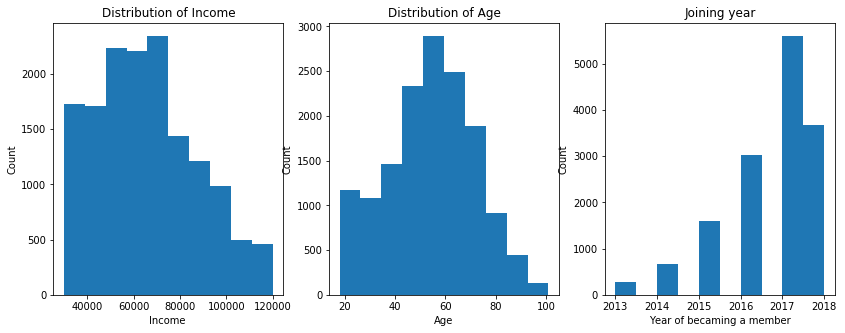

In [43]:
from matplotlib import pyplot as plt

# Drawing 3 subplots in a row
f, axius = plt.subplots(figsize=(14, 5), nrows=1, ncols=3)

# plot for income distribution 
plt.sca(axius[0])
plt.hist(profile_data['income'])
plt.xlabel('Income ')
plt.ylabel('Count')
plt.title('Distribution of Income');

# plot for age distribution 
plt.sca(axius[1])
plt.hist(profile_data['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')



# plot for joining
plt.sca(axius[2])
plt.hist(profile_data['became_member_year'])
plt.xlabel('Year of becaming a member')
plt.ylabel('Count')
plt.title('Joining year');

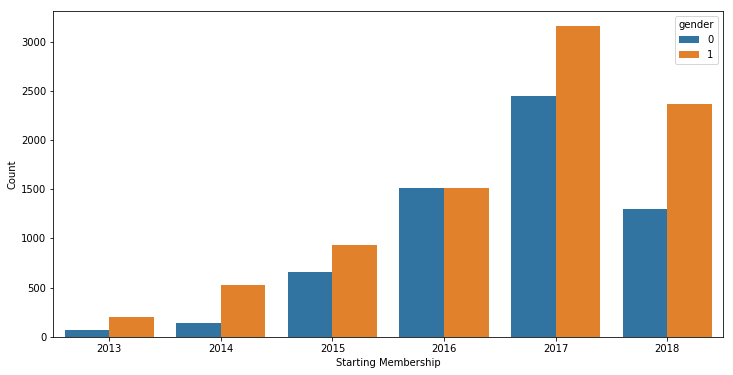

In [44]:
import seaborn as sns
# groupby became_member_year and gender 
df = profile_data.groupby(['became_member_year', 'gender']).size()
df = df.reset_index()
df.columns = ['became_member_year', 'gender', 'count']


plt.figure(figsize=(12, 6))
sns.barplot(x='became_member_year', y='count', hue='gender', data=df)
plt.xlabel('Starting Membership')
plt.ylabel('Count');

In [45]:
## How many days usually customers interact with offers

In [46]:
less10days = transactions[transactions.time<10]['time'].count()/transactions['time'].count()*100
more30days = transactions[transactions.time>=20]['time'].count()/transactions['time'].count()*100


print(less10days, more30days)

28.6857539308 37.4621844672


It is clear from the transactions data that  29% of customers interacted with offers in 10 days, where 37% of the customers tool more than 20 days.

In [47]:
profile_data.head()

,age,gender,customer_id,income,became_member_year,became_member_month,became_member_day
1,55.0,0,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,7,15
3,75.0,0,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,5,9
5,68.0,1,e2127556f4f64592b11af22de27a7932,70000.0,2018,4,26
8,65.0,1,389bc3fa690240e798340f5a15918d5c,53000.0,2018,2,9
12,58.0,1,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017,11,11


In [48]:
portfolio_data.head()

,difficulty,duration,offer_id,reward,bogo,discount,informational,web,email,social,mobile
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,10,1,0,0,0.0,1.0,1.0,1.0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,10,1,0,0,1.0,1.0,1.0,1.0
2,0,4,3f207df678b143eea3cee63160fa8bed,0,0,0,1,1.0,1.0,0.0,1.0
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,1,0,0,1.0,1.0,0.0,1.0
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,0,1,0,1.0,1.0,0.0,0.0


In [49]:
transactions.head()

,customer_id,time,amount
12654,02c083884c7d45b39cc68e1314fec56c,0.0,0.83
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0.0,34.56
12659,54890f68699049c2a04d415abc25e717,0.0,13.23
12670,b2f1cd155b864803ad8334cdf13c4bd2,0.0,19.51
12671,fe97aa22dd3e48c8b143116a8403dd52,0.0,18.97


In [50]:
offers.head()

,customer_id,time,offer_id,reward,offer_completed,offer_received,offer_viewed
0,78afa995795e4d85b5d9ceeca43f5fef,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0,1,0
2,e2127556f4f64592b11af22de27a7932,0.0,2906b810c7d4411798c6938adc9daaa5,0.0,0,1,0
5,389bc3fa690240e798340f5a15918d5c,0.0,f19421c1d4aa40978ebb69ca19b0e20d,0.0,0,1,0
7,2eeac8d8feae4a8cad5a6af0499a211d,0.0,3f207df678b143eea3cee63160fa8bed,0.0,0,1,0
8,aa4862eba776480b8bb9c68455b8c2e1,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,0,1,0


## Data Combination

In [51]:

def data_combination(offers, transactions, profile_data, portfolio_data):
    data_comination = []
    customers_ids = offers['customer_id'].unique()   
                                                                        
    # passing through all customer ids in offers dataset
    for i in range(len(customers_ids)):
        
        # get customer id 
        custumer_id = customers_ids[i]
        
        # getting customer details from profile data
        customer_details = profile_data[profile_data['customer_id']==custumer_id]
        
        # getting offers details that are related to the customer
        custumer_offer_data = offers[offers['customer_id']==custumer_id]
        
        # getting transactions details related to the customer
        custumer_transaction_data = transactions[transactions['customer_id']==custumer_id]
        
        
        offers_received_data = custumer_offer_data[custumer_offer_data['offer_received'] == 1]
        offers_completed_data = custumer_offer_data[custumer_offer_data['offer_completed'] == 1]
        offers_viewed_data = custumer_offer_data[custumer_offer_data['offer_viewed'] == 1]
        
        records = []
        # passing through each received offer
        for j in range(offers_received_data.shape[0]):
            
            # retriving the id of an offer 
            offer_id = offers_received_data.iloc[j]['offer_id']
            
            # retriving offer row from portfolio_data
            offer_record = portfolio_data.loc[portfolio_data['offer_id'] == offer_id]
            
            # retriving duration 
            duration = offer_record['duration'].values[0]
            
            # seeting start and end time of an offer
            starting_time = offers_received_data.iloc[j]['time']
            ending_time = starting_time + duration
        
            # collecting offers completed within duration
            offer_completed_within_duration = np.logical_and(
                offers_completed_data['time'] >= starting_time, offers_completed_data['time'] <= ending_time)
            
            # collecting offers viewed within duration
            offer_viewed_within_duration =  np.logical_and(
                offers_viewed_data['time'] >= starting_time, offers_viewed_data['time'] <=ending_time)

            # creat a filed offer_success to be 1 if an offer is viewed and completed within duration or 0 otherwise
            offer_success = (offer_completed_within_duration.sum() > 0 and offer_viewed_within_duration.sum() > 0)
            
            
            # collecting the transactions occured within duration
            transaction_within_duration =  np.logical_and(
                custumer_transaction_data['time'] >= starting_time, custumer_transaction_data['time'] <= ending_time)
        
            transaction_data = custumer_transaction_data[transaction_within_duration]
            
            # total amount spent by a customer from given offers
            transaction_overall_amount = transaction_data['amount'].sum()
            
            record = {
                'offer_id': offer_id,
                'customer_id': custumer_id,
                'time': starting_time,
                'overall_amount': transaction_overall_amount,
                'offer_success': int(offer_success),
            }
                
            record.update(offer_record.iloc[0,0:].to_dict())

            record.update(customer_details.iloc[0,:].to_dict())

            records.append(record)
        
        data_comination.extend(records)
    
    data_comination = pd.DataFrame(data_comination)
    return data_comination

In [52]:
data = data_combination(offers, transactions, profile_data, portfolio_data)

In [53]:
data.head()

,age,became_member_day,became_member_month,became_member_year,bogo,customer_id,difficulty,discount,duration,email,...,income,informational,mobile,offer_id,offer_success,overall_amount,reward,social,time,web
0,75.0,9,5,2017,1,78afa995795e4d85b5d9ceeca43f5fef,5,0,7,1.0,...,100000.0,0,1.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,37.67,5,0.0,0.0,1.0
1,75.0,9,5,2017,0,78afa995795e4d85b5d9ceeca43f5fef,0,0,3,1.0,...,100000.0,1,1.0,5a8bc65990b245e5a138643cd4eb9837,0,49.39,0,1.0,7.0,0.0
2,75.0,9,5,2017,1,78afa995795e4d85b5d9ceeca43f5fef,10,0,7,1.0,...,100000.0,0,1.0,ae264e3637204a6fb9bb56bc8210ddfd,1,48.28,10,1.0,17.0,0.0
3,75.0,9,5,2017,1,78afa995795e4d85b5d9ceeca43f5fef,5,0,5,1.0,...,100000.0,0,1.0,f19421c1d4aa40978ebb69ca19b0e20d,1,48.28,5,1.0,21.0,1.0
4,68.0,26,4,2018,0,e2127556f4f64592b11af22de27a7932,10,1,7,1.0,...,70000.0,0,1.0,2906b810c7d4411798c6938adc9daaa5,0,0.00,2,0.0,0.0,1.0


In [54]:

data.offer_success.value_counts()

0    35136
1    31365
Name: offer_success, dtype: int64

In [55]:
columns_list = ['time', 'overall_amount', 
                'difficulty', 'duration', 
                'reward', 'bogo', 'discount', 'informational',
                'email', 'mobile', 'social', 'web', 'became_member_year', 'became_member_month',
                'gender', 'income', 'age']

data_x = data[columns_list]
data_y = data['offer_success']

print(data_x.shape)
print(data_y.shape)

(66501, 17)
(66501,)


## Building a Model

In [56]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(data_x,data_y, shuffle=True, test_size = 0.2)

############### Model Training  ####################
#create a randomforest model with 100 trees
model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features='sqrt')
model.fit(X_train, y_train)    
    

############# Model Evaluation  ##################
print("Accuracy of the model on training data: ", model.score(X_train, y_train))
print("Accuracy of the model on testing data: ", model.score(X_test, y_test))


Accuracy of the model on training data:  1.0
Accuracy of the model on testing data:  0.916923539583


In [57]:
from sklearn.metrics import f1_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("F1 score on training data: ", f1_score(y_train, y_train_pred))
print("F1 score on testing data: ", f1_score(y_test, y_test_pred))

F1 score on training data:  1.0
F1 score on testing data:  0.913067421918
